# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import zscore


from sklearn.tree import plot_tree

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Define Dataset

In [3]:
df = pd.read_csv("breast-cancer_cleaned.csv")
df

,texture_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-2.073335,2.217515,2.255747,-0.565265,-0.321821,-0.214002,0.724026,0.660820,1.148757,0.907083,1.307686,1.139636,1.937015,1
1,-0.353632,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.243890,0.281190,1
2,0.456187,0.939685,-0.398008,-0.780083,0.557852,-0.297005,0.213076,1.424827,0.237036,0.293559,0.527407,1.152255,0.201391,1
3,0.253732,0.155462,0.046836,-0.110409,-0.288378,0.689702,0.819518,1.115007,-0.069777,0.267687,0.749217,-0.115114,0.230872,1
4,-1.151816,-0.009560,-0.562450,-0.790244,0.156716,1.483067,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,-0.312589,-0.931027,0.071025,0.350640,1.086384,0.666001,2.067178,-1.138416,0.167980,0.378365,-1.360158,-0.709091,1
565,2.085134,-0.217664,-1.058611,0.322856,-0.131594,-0.424010,0.252202,0.808431,-0.189161,-0.490556,-0.691230,-0.531855,-0.973978,1
566,2.045574,-0.809117,-0.895587,-0.257371,0.180698,-0.379342,0.510827,0.612157,-0.891416,0.036727,-0.809587,-1.104549,-0.318409,1
567,2.336457,2.137194,1.043695,0.686088,0.183955,-0.173000,1.302285,0.785721,0.326634,0.904057,1.430427,1.919083,0.936537,1


# Training Classifiers

## Understand Dataset

In [4]:
df.head()

,texture_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-2.073335,2.217515,2.255747,-0.565265,-0.321821,-0.214002,0.724026,0.660820,1.148757,0.907083,1.307686,1.139636,1.937015,1
1,-0.353632,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.243890,0.281190,1
2,0.456187,0.939685,-0.398008,-0.780083,0.557852,-0.297005,0.213076,1.424827,0.237036,0.293559,0.527407,1.152255,0.201391,1
3,0.253732,0.155462,0.046836,-0.110409,-0.288378,0.689702,0.819518,1.115007,-0.069777,0.267687,0.749217,-0.115114,0.230872,1
4,-1.151816,-0.009560,-0.562450,-0.790244,0.156716,1.483067,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.868353,-0.397100,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   texture_mean             569 non-null    float64
 1   symmetry_mean            569 non-null    float64
 2   fractal_dimension_mean   569 non-null    float64
 3   texture_se               569 non-null    float64
 4   area_se                  569 non-null    float64
 5   smoothness_se            569 non-null    float64
 6   concavity_se             569 non-null    float64
 7   concave points_se        569 non-null    float64
 8   symmetry_se              569 non-null    float64
 9   fractal_dimension_se     569 non-null    float64
 10  smoothness_worst         569 non-null    float64
 11  symmetry_worst           569 non-null    float64
 12  fractal_dimension_worst  569 non-null    float64
 13  diagnosis                569 non-null    int64  
dtypes: float64(13), int64(1)
m

**Dataset Overview**

- **Number of Features:** 12
- **Feature Types:**
  - 5 categorical features
  - 6 numerical features
- **Target Type:**
  - Numerical feature
- **Missing Values:** None


**RestingBP** represents the resting blood pressure (mmHg).  
**Cholesterol** represents the serum cholesterol level (mg/dL).  
**FastingBS** indicates if fasting blood sugar is greater than 120 mg/dL.  
**RestingECG** results of the resting electrocardiogram test.  
**MaxHR** represents the maximum heart rate achieved.  
**ExerciseAngina** indicates if exercise-induced angina is present.  
**Oldpeak** represents the ST depression induced by exercise relative to rest (often used to measure ischemia).  
**ST_Slope** represents the slope of the peak exercise ST segment.  
**HeartDisease** is the target column

## Descriptive Analysis

In [6]:
data = df.drop('diagnosis', axis=1)
categorical_features = list(data.select_dtypes(include=['object']).columns)
numerical_features = list(data.select_dtypes(include=['number']).columns)

### Numerical features

In [7]:
df.describe()

,texture_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,-0.035088,-0.054011,-0.059032,-0.097957,-0.231252,-0.130518,-0.104282,-0.084164,-0.134157,-0.128995,-0.020926,-0.094080,-0.082527,0.372583
std,0.933015,0.877368,0.850243,0.777403,0.367687,0.681736,0.606396,0.801527,0.680818,0.579293,0.944023,0.778774,0.794977,0.483918
min,-2.229249,-2.353466,-1.819865,-1.554264,-0.737829,-1.776065,-1.057501,-1.913447,-1.532890,-1.096968,-2.240829,-2.160960,-1.601839,0.000000
25%,-0.725963,-0.703240,-0.722639,-0.694809,-0.494754,-0.624018,-0.557161,-0.674490,-0.651681,-0.585118,-0.691230,-0.641864,-0.691912,0.000000
50%,-0.104636,-0.071627,-0.178279,-0.197498,-0.352711,-0.224002,-0.200060,-0.143740,-0.220641,-0.249231,-0.046843,-0.127409,-0.216444,0.000000
75%,0.537634,0.516175,0.470983,0.404865,-0.035711,0.311020,0.286950,0.455787,0.272148,0.257626,0.597545,0.424254,0.438017,1.000000
max,2.485389,2.363553,2.255747,2.193808,0.949658,1.796413,1.671985,2.185591,1.806213,1.596257,2.451803,2.027474,2.130970,1.000000


**Validate features Range**

- **Age**: 0 to 120 years  
  **Validated**

- **RestingBP (Resting Blood Pressure)**: 0 to 250 mmHg  
  - Typical systolic blood pressure values.  
  - *Values below 90 or above 200 are clinically abnormal.*
  **Validated**

- **Cholesterol**: 0 to 600 mg/dL  
  - Normal and extreme clinical levels.  
  - *Values above 300 are rare and usually indicate a serious condition.*  
  **Max observed: 603**

- **FastingBS (Fasting Blood Sugar)**: [0, 1]  
  - Binary indicator:  
    - `1` for fasting blood sugar > 120 mg/dL  
    - `0` otherwise.  
  **Validated**

- **MaxHR (Maximum Heart Rate)**: 0 to 220 bpm  
  - Calculated roughly as 220 minus age, though extremes are possible.  
  - *Typical values range from 60 bpm (resting) to around 200 bpm (during exercise).*
  
    **Validated**

- **Oldpeak**: 0 to 6.5  
  - Represents ST depression or elevation, typically measured in mm.  
  - *Values above 5.0 are rare and clinically significant.*  
  **Negative values observed.**

- **HeartDisease**: [0, 1]  
  - Binary indicator:  
    - `1` for presence of heart disease  
    - `0` for absence.


Values Outside the Expected Range:

- **Cholesterol**: Expected range from 0 to 600 mg/dL, but **603 mg/dL** was observed.
- **Oldpeak**: Expected range from 0 to 6.5, but **negative values** were observed.


#### Detect Outliers

In [8]:
def detect_outliers(df, feature, threshold=3):
    z_scores = zscore(df[feature])
    outliers = (z_scores > abs(threshold))
    print(f"{outliers.sum()} outliers detected in '{feature}':")
    print(df[feature][outliers])
    print("-" * 50)
    return df[feature][outliers]

In [9]:
numerical_outliers = {}    
for feature in numerical_features:
    numerical_outliers[feature] = detect_outliers(data, feature)

0 outliers detected in 'texture_mean':
Series([], Name: texture_mean, dtype: float64)
--------------------------------------------------
0 outliers detected in 'symmetry_mean':
Series([], Name: symmetry_mean, dtype: float64)
--------------------------------------------------
0 outliers detected in 'fractal_dimension_mean':
Series([], Name: fractal_dimension_mean, dtype: float64)
--------------------------------------------------
0 outliers detected in 'texture_se':
Series([], Name: texture_se, dtype: float64)
--------------------------------------------------
7 outliers detected in 'area_se':
85     0.885853
127    0.899714
181    0.904775
202    0.942177
237    0.949658
393    0.894434
449    0.914235
Name: area_se, dtype: float64
--------------------------------------------------
0 outliers detected in 'smoothness_se':
Series([], Name: smoothness_se, dtype: float64)
--------------------------------------------------
0 outliers detected in 'concavity_se':
Series([], Name: concavity_se

Since the outliers are meaningful and provide important insights (rare but valid in medical datasets),
they might be retained in the dataset.

### Categorical features

In [10]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
    print()

**ChestPainType**:
ATA (Atypical Angina),
NAP (Non-Anginal Pain),
ASY (Asymptomatic),
TA (Typical Angina)

**RestingECG**:
Normal,
ST (ST-segment depression or elevation),
LVH (Left Ventricular Hypertrophy)

#### Categories frequency

In [11]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print()

#### Inspecting infrequent categories

In [12]:
def detect_infrequent_categories(df, feature, threshold = 0.05*len(df)):
    value_counts = df[feature].value_counts()
    infrequent = value_counts[value_counts < threshold].index
    return infrequent

In [13]:
categorical_outliers = {}
for feature in df.select_dtypes(include=['object']):
    olist = detect_infrequent_categories(df, feature)
    categorical_outliers[feature] = olist
categorical_outliers

{}

No outliers in categorical columns

## Drop duplicates

In [14]:
df.duplicated().sum()

0

We don't have duplicates

### Split data into Train, Validation, and Test Sets

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

Split data into training (80%), testing (20%)

Then training into training (80%), validation (20%)

64% training - 16% validation - 20% testing

### Evaluation functions

In [15]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    results = classification_report(y_true, y_pred)
    print(results)
    print("Accuracy:", accuracy_score(y_true, y_pred))


In [16]:
def print_metrics_from_labels(y_true, y_pred, model_name):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Metrics calculations
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)  # Same as recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Manual calc for specificity
    error_rate = 1 - accuracy

    # Print the metrics with model name
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Error Rate: {error_rate * 100:.2f}%")
    print(f"Sensitivity (Recall): {sensitivity * 100:.2f}%")
    print(f"Specificity: {specificity * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")

# Example Usage
y_true = [1, 0, 1, 1, 0, 0, 1, 0, 0, 0]  # Replace with actual labels
y_pred = [0, 0, 1, 1, 0, 0, 0, 0, 1, 0]  # Replace with predicted labels
model_name = "Decision Tree Classifier"

print_metrics_from_labels(y_true, y_pred, model_name)

Metrics for Decision Tree Classifier:
Accuracy: 70.00%
Error Rate: 30.00%
Sensitivity (Recall): 50.00%
Specificity: 83.33%
Precision: 66.67%


In [17]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=np.unique(y_true))
    disp.plot(cmap='Blues', values_format=".2f")  # Display values with 2 decimal places
    plt.title(f"Confusion Matrix for {model_name} (Percentage)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### Function to plot training and validation accuracy from GridSearchCV results

In [18]:
def plot_hyperparameter_results(grid_search, model_name):
    # Extract results
    results = grid_search.cv_results_

    # Get mean training and validation scores
    mean_train_scores = results['mean_train_score']  # Training accuracy
    mean_val_scores = results['mean_test_score']    # Validation accuracy
    param_combinations = results['params']          # Hyperparameter combinations

    # Plot training and validation accuracy
    indices = np.arange(len(param_combinations))
    plt.figure(figsize=(20, 7))
    plt.plot(indices, mean_train_scores, marker='o', linestyle='-', color='blue', label='Training Accuracy')
    plt.plot(indices, mean_val_scores, marker='o', linestyle='--', color='orange', label='Validation Accuracy')

    # Add labels, legend, and grid
    plt.xlabel('Hyperparameter Configuration Index')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy vs. Hyperparameter Configuration ({model_name})')
    plt.xticks(indices, labels=indices)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Print the configurations and their scores
    for i, params in enumerate(param_combinations):
        print()
        print(f"Configuration {i}: {params}")
        print(f"   Training Accuracy: {mean_train_scores[i]:.4f}", f"\t\t   Validation Accuracy: {mean_val_scores[i]:.4f}")


## Decision Tree

### Training

#### Split data into train - test sets

In [19]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Split data into training (80%), testing (20%)

The training set will be splited into train - val to get best hyperparameters using cross validation.

#### Intialize model

In [20]:
# Initialize the Decision Tree model with a fixed random seed for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)

#### Get best hyperparameters using grid search

In [21]:
# Hyperparameter grid for tuning the Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],     # Use both Gini impurity and entropy for splitting nodes
    'max_depth': [3, 4],               # Test different maximum depths of the tree
    'min_samples_split': [30, 35],        # Minimum samples required to split an internal node
    'min_samples_leaf': [5, 10, 15],      # Minimum samples required to be at a leaf node
    'ccp_alpha': [0.005, 0.02],            # Pruning parameter to control overfitting
    'max_features': [None, 'sqrt', 'log2']          # Added max features
}

In [22]:
# Set up GridSearchCV to tune hyperparameters with 5-fold cross-validation
dt_grid_search = GridSearchCV(
    estimator=dt_model,                 # Decision Tree model
    param_grid=dt_param_grid,           # Hyperparameter grid for tuning
    scoring='accuracy',                 # Evaluate model based on accuracy score
    cv=5,                               # 5-fold cross-validation
    return_train_score=True,            # Return training scores
    n_jobs=-1,                          # Use all CPU cores for parallel processing
    verbose=2                           # Display progress during the search
)

#### Fit model to get e best hyperparameters

In [23]:
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.005, 0.02],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 4],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [30, 35]},
             return_train_score=True, scoring='accuracy', verbose=2)

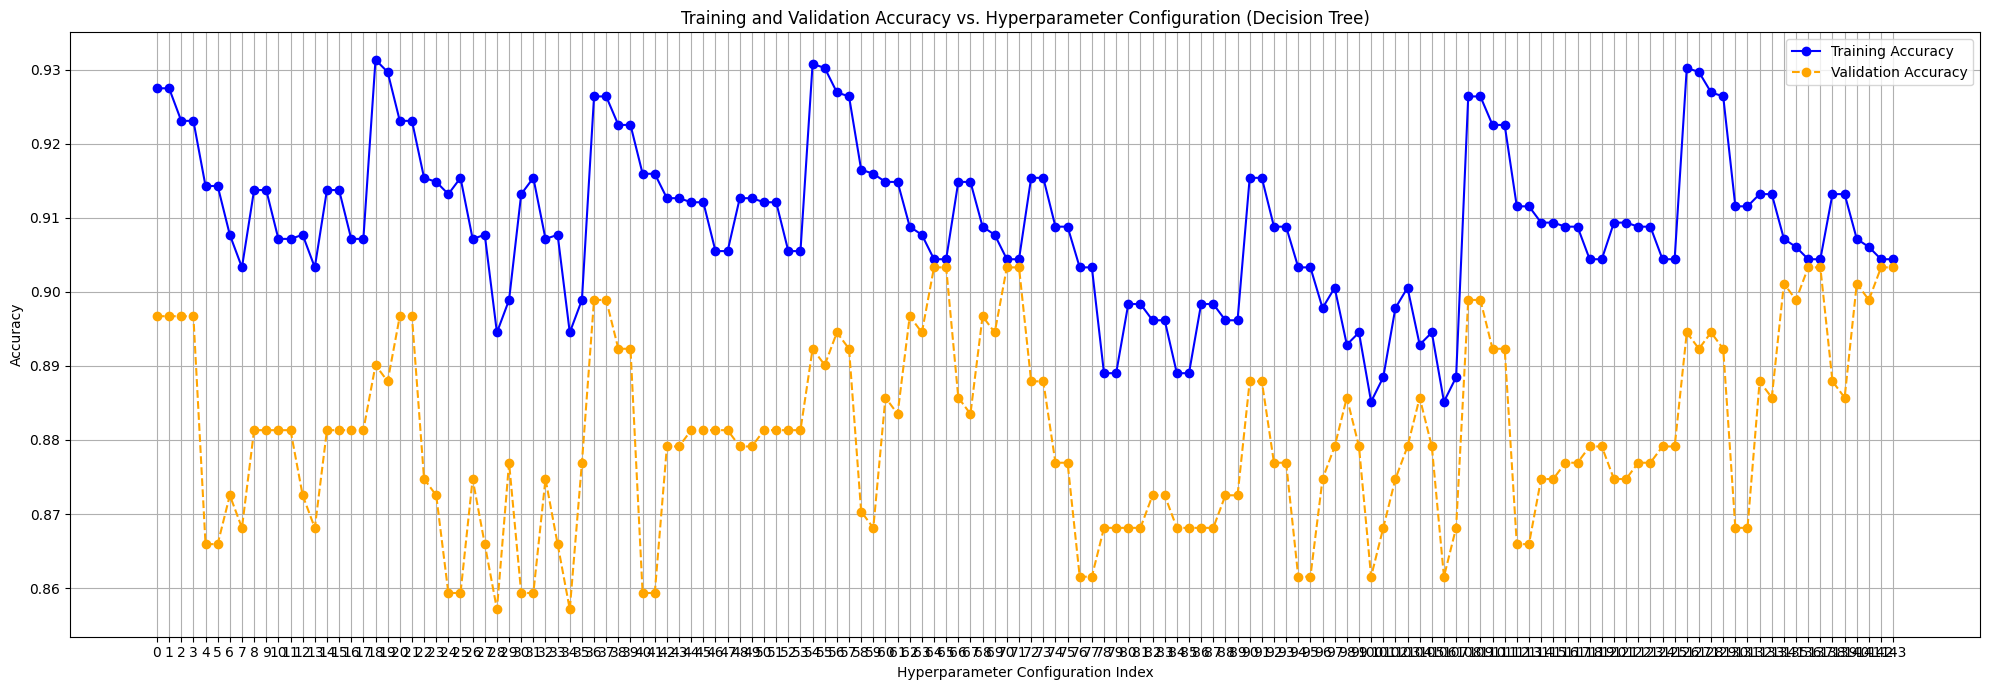


Configuration 0: {'ccp_alpha': 0.005, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 30}
   Training Accuracy: 0.9275 		   Validation Accuracy: 0.8967

Configuration 1: {'ccp_alpha': 0.005, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 35}
   Training Accuracy: 0.9275 		   Validation Accuracy: 0.8967

Configuration 2: {'ccp_alpha': 0.005, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 30}
   Training Accuracy: 0.9231 		   Validation Accuracy: 0.8967

Configuration 3: {'ccp_alpha': 0.005, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 35}
   Training Accuracy: 0.9231 		   Validation Accuracy: 0.8967

Configuration 4: {'ccp_alpha': 0.005, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 30}
   Training Accurac

In [24]:
plot_hyperparameter_results(dt_grid_search, "Decision Tree")

In [25]:
# Get the best model based on the grid search
best_dt_model = dt_grid_search.best_estimator_
dt_grid_search.best_params_

{'ccp_alpha': 0.005,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 30}

In [26]:
dt_grid_search.best_index_

64

### Training Evaluation

#### Grid search best model validation accuracy

In [27]:
# Get the index of the best configuration
best_config_index = dt_grid_search.best_index_
best_val_accuracy = dt_grid_search.cv_results_['mean_test_score'][best_config_index]

# Print the best configuration and its corresponding accuracy
print(f"Validation accuracy for best configuration: {best_val_accuracy * 100:.2f}%")

Validation accuracy for best configuration: 90.33%


##### Cross-validation accuracy after grid search

In [28]:
# Perform cross-validation
scores = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.92307692 0.84615385 0.93406593 0.89010989 0.92307692]
Mean Accuracy: 0.9032967032967033


### Testing Evaluation

#### Classification Report

In [29]:
# Predict labels for the test set using the best Decision Tree model
y_test_pred_dt = best_dt_model.predict(X_test)
# Evaluate the model on the test set
report_test_dt = evaluate_model(y_test, y_test_pred_dt, "Tuned Decision Tree")


Tuned Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        72
           1       0.82      0.67      0.74        42

    accuracy                           0.82       114
   macro avg       0.82      0.79      0.80       114
weighted avg       0.82      0.82      0.82       114

Accuracy: 0.8245614035087719


#### Confusion Matrix

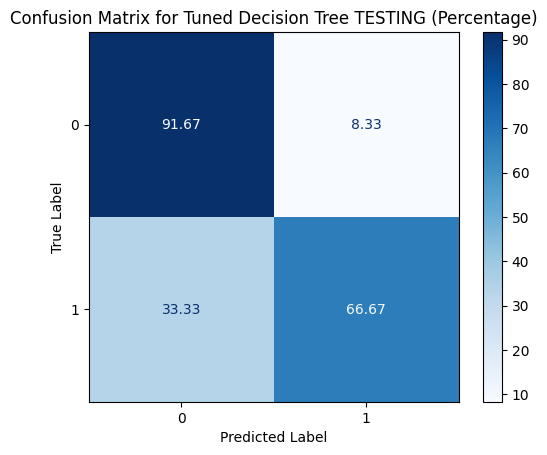

In [30]:
# Plot the confusion matrix for the Decision Tree model on the test set
plot_confusion_matrix(y_test, y_test_pred_dt, "Tuned Decision Tree TESTING")

### Plot Decision Tree

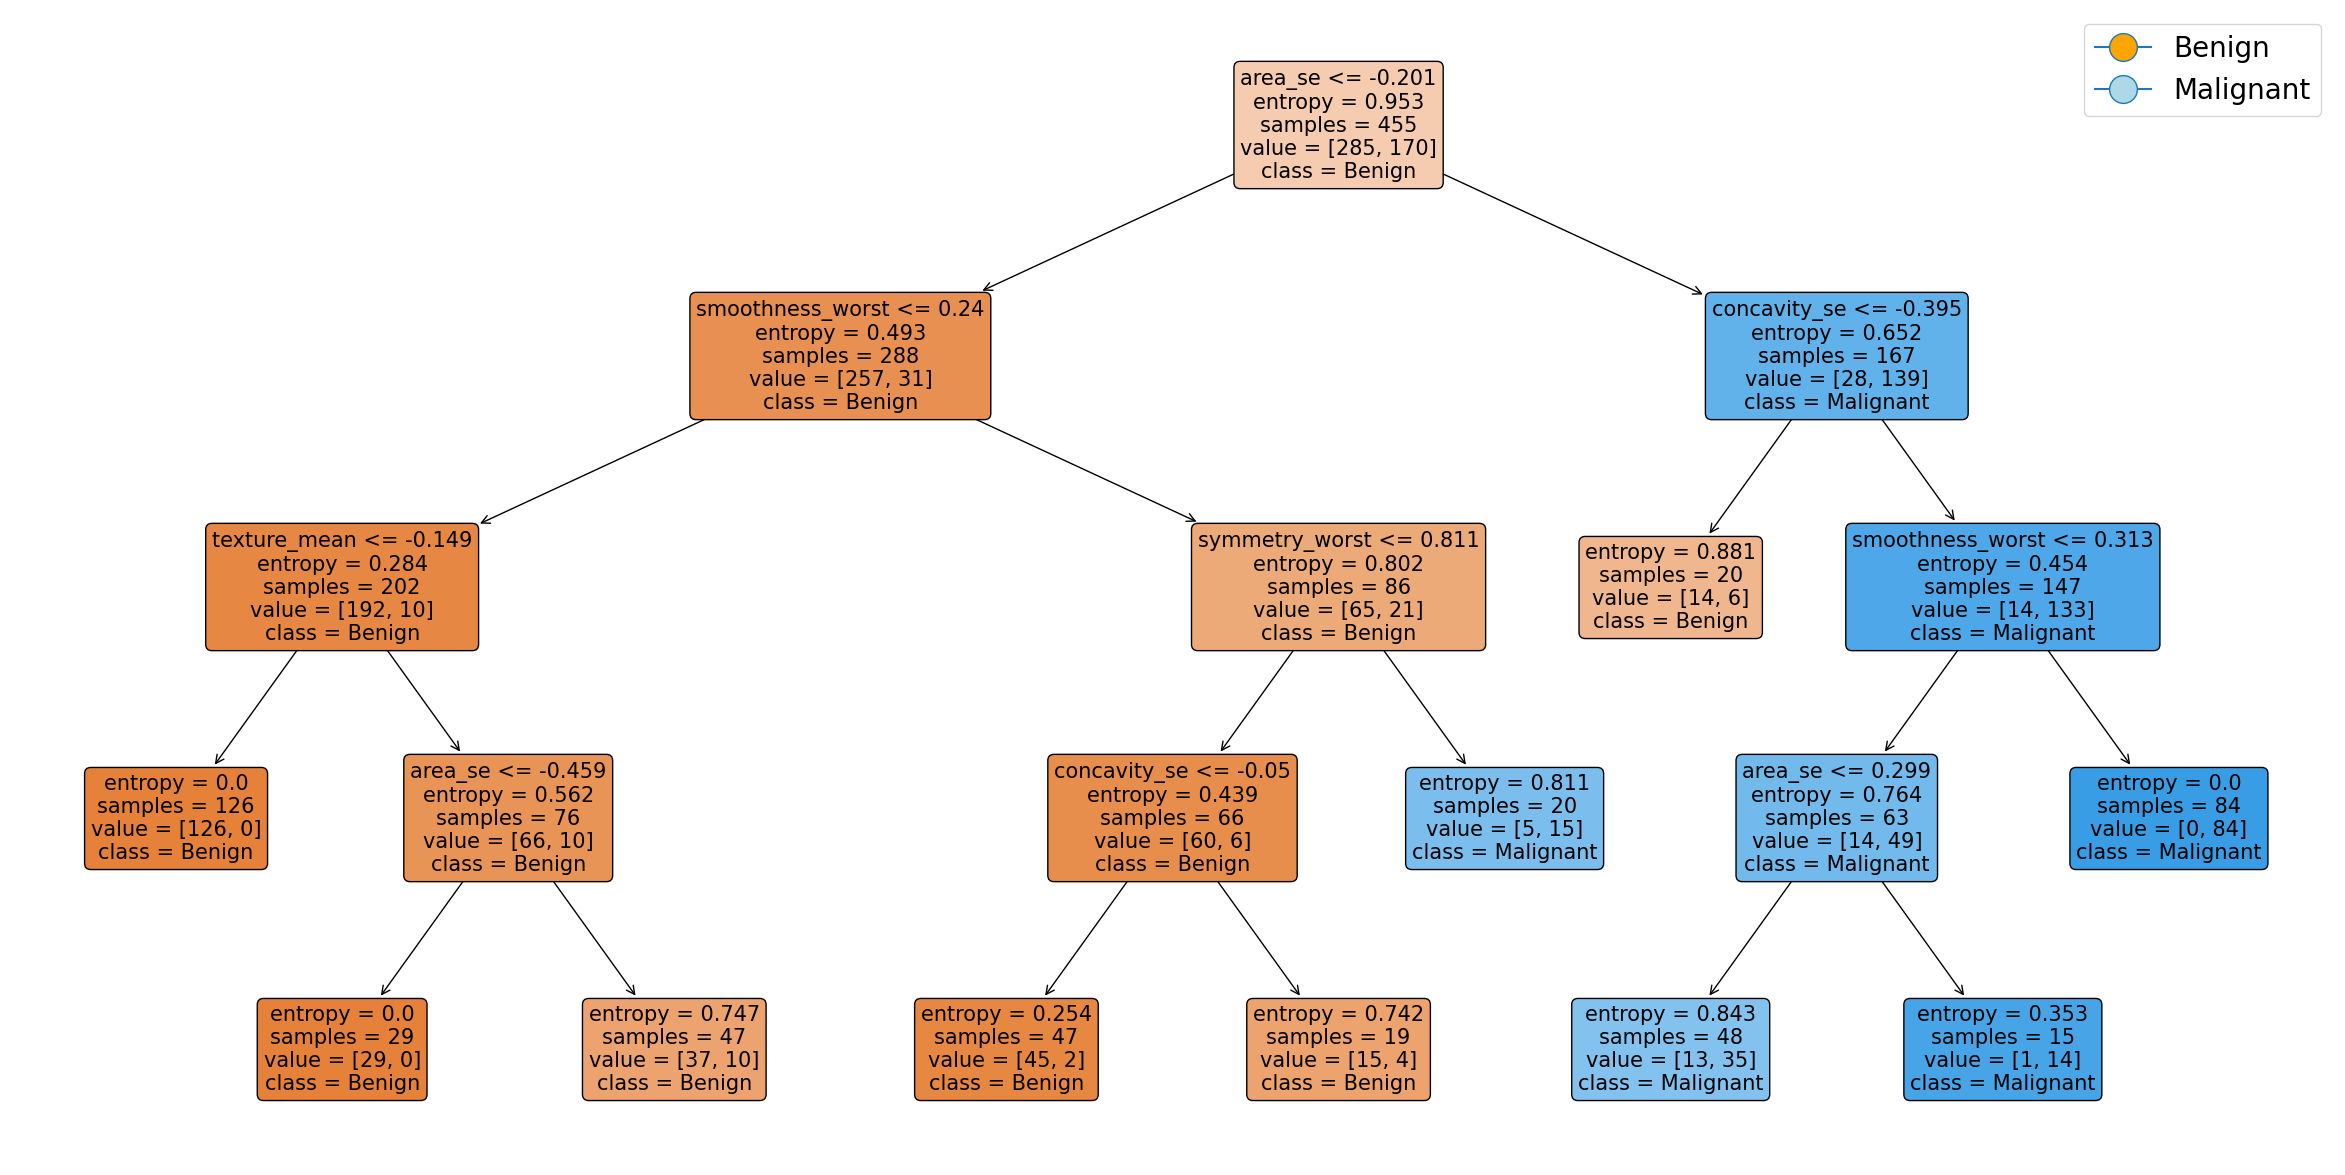

In [31]:
plt.figure(figsize=(30,15))
plot_tree(best_dt_model, filled=True, feature_names=X_train.columns, class_names=["Benign", "Malignant"], rounded=True, fontsize=15)

# Add a legend with colors for the classes
plt.legend(handles=[plt.Line2D([0], [0], marker='o', markerfacecolor=color, markersize=20) for color in ['orange', 'lightblue']], 
           labels=["Benign", "Malignant"], loc="best", fontsize=20)
plt.show()

## KNN Classifier

### Intialize model

In [32]:
knn_model = KNeighborsClassifier()

#### Get best hyperparameters using grid search

In [33]:
# Define a dictionary for hyperparameter tuning
knn_param_grid = {
    # List of possible values for the number of neighbors to consider during classification
    'n_neighbors': [3, 5, 7, 9, 11],

    # Set the 'weights' parameter to 'uniform', meaning each neighbor has an equal weight in the prediction
    'weights': ['uniform'],

    # List of distance metrics to use when calculating the distance between data points
    'metric': ['euclidean', 'manhattan']
}

In [34]:
# Set up GridSearchCV to search for the best hyperparameters
knn_grid_search = GridSearchCV(
    estimator=knn_model,                # KNN model
    param_grid=knn_param_grid,          # Hyperparameter grid to search
    scoring='f1_weighted',              # Use F1 weighted score as evaluation metric
    cv=5,                               # 5-fold cross-validation
    return_train_score=True             # Return training scores
)

#### Fit model to get best hyperparameters

In [35]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform']},
             return_train_score=True, scoring='f1_weighted')

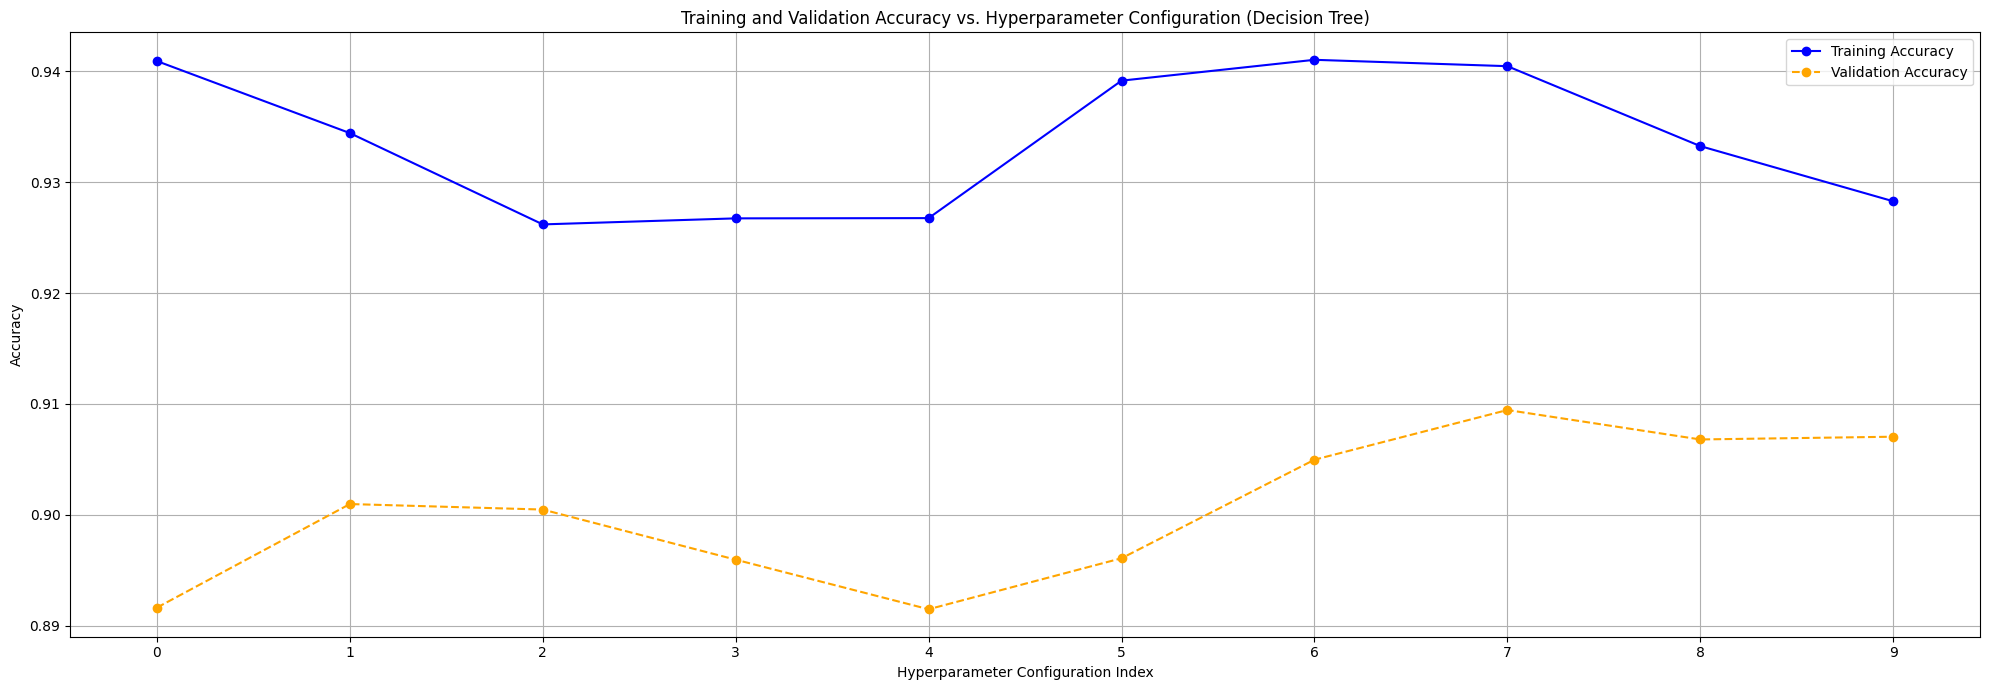


Configuration 0: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
   Training Accuracy: 0.9409 		   Validation Accuracy: 0.8916

Configuration 1: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
   Training Accuracy: 0.9344 		   Validation Accuracy: 0.9010

Configuration 2: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
   Training Accuracy: 0.9262 		   Validation Accuracy: 0.9005

Configuration 3: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
   Training Accuracy: 0.9267 		   Validation Accuracy: 0.8959

Configuration 4: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
   Training Accuracy: 0.9268 		   Validation Accuracy: 0.8915

Configuration 5: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
   Training Accuracy: 0.9392 		   Validation Accuracy: 0.8961

Configuration 6: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
   Training Accuracy: 0.9410 		   Validation Accuracy

In [36]:
plot_hyperparameter_results(knn_grid_search, "Decision Tree")

In [37]:
best_knn_model = knn_grid_search.best_estimator_
knn_grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

In [38]:
knn_grid_search.best_index_

7

### Training Evaluation

#### Grid search best model validation accuracy

In [39]:
# Get the index of the best configuration
best_config_index = knn_grid_search.best_index_
best_val_accuracy = knn_grid_search.cv_results_['mean_test_score'][best_config_index]

# Print the best configuration and its corresponding accuracy
print(f"Validation accuracy for best configuration: {best_val_accuracy * 100:.2f}%")


Validation accuracy for best configuration: 90.94%


#### Cross-validation accuracy after grid search

In [40]:
# Perform cross-validation
scores = cross_val_score(best_knn_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.92307692 0.89010989 0.91208791 0.93406593 0.89010989]
Mean Accuracy: 0.9098901098901099


### Testing Evaluation

#### Classification Report

In [41]:
# Predict labels for the test set using the best KNN model
y_test_pred_knn = best_knn_model.predict(X_test)
# Evaluate the performance of the tuned KNN model on the test set
report_test_knn = evaluate_model(y_test, y_test_pred_knn, "Tuned KNN")


Tuned KNN Performance:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        72
           1       0.89      0.74      0.81        42

    accuracy                           0.87       114
   macro avg       0.87      0.84      0.85       114
weighted avg       0.87      0.87      0.87       114

Accuracy: 0.868421052631579


#### Confusion Matrix

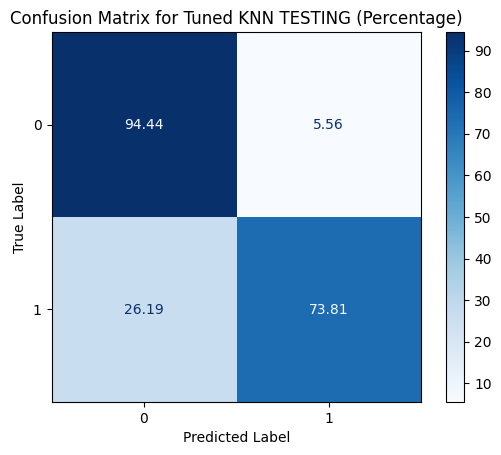

In [42]:
# Plot confusion matrix for KNN on the test set
plot_confusion_matrix(y_test, y_test_pred_knn, "Tuned KNN TESTING")

## Naive Bayes Classifier

#### Intialize model

In [43]:
nb_model = GaussianNB()

In [44]:
X_trainn, X_valid, y_trainn, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#### Get best hyperparameters

In [45]:
# Define hyperparameter grids for Naive Bayes
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
best_accuracy = 0
best_params = None
best_model = None
accuracies = [] 

In [46]:
for var_smoothing in var_smoothing_values:
    # Create the Naive Bayes classifier with the current hyperparameter
    nb_classifier = GaussianNB(var_smoothing=var_smoothing)

    # Train the model
    nb_classifier.fit(X_trainn, y_trainn)

    # Step 4: Evaluate on the test set
    y_pred = nb_classifier.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    accuracies.append(accuracy)

    # Print the evaluation results
    print(f"Hyperparameter 'var_smoothing' = {var_smoothing}")
    print(f"Accuracy: {accuracy:.4f}")

    # If the current model has better accuracy, update best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'var_smoothing': var_smoothing}
        best_model = nb_classifier

Hyperparameter 'var_smoothing' = 1e-09
Accuracy: 0.9123
Hyperparameter 'var_smoothing' = 1e-08
Accuracy: 0.9123
Hyperparameter 'var_smoothing' = 1e-07
Accuracy: 0.9123
Hyperparameter 'var_smoothing' = 1e-06
Accuracy: 0.9123
Hyperparameter 'var_smoothing' = 1e-05
Accuracy: 0.9123


#### Fit model to get best hyperparameters

In [47]:
nb_classifier = GaussianNB(var_smoothing=best_params['var_smoothing'])
nb_classifier.fit(X_trainn, y_trainn)

GaussianNB()

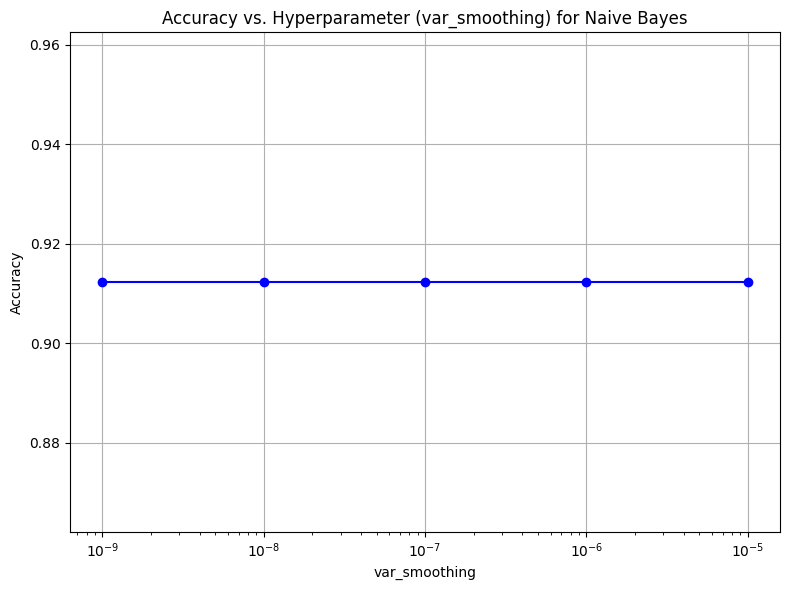

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(var_smoothing_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xscale('log')  # Use logarithmic scale for better visualization of small values
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Hyperparameter (var_smoothing) for Naive Bayes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
var_smoothing
#y_val_pred_nb = best_nb_model.predict(X_val)

1e-05

### Training Evaluation

#### Grid search best model validation accuracy

In [51]:
# Print the best configuration and its corresponding accuracy
print(f"Validation accuracy for best configuration: {best_accuracy * 100:.2f}%")


Validation accuracy for best configuration: 91.23%


#### Validation 

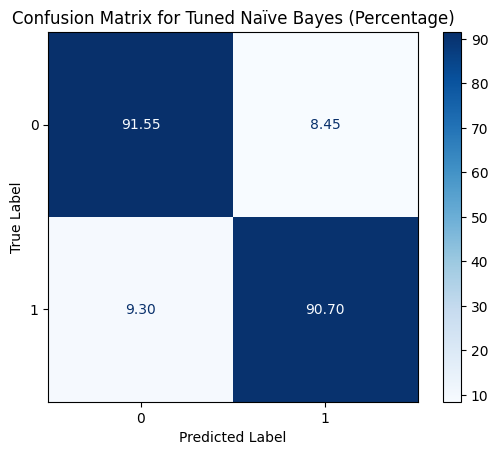

In [53]:
y_val_pred_nb = nb_classifier.predict(X_valid)

plot_confusion_matrix(y_valid, y_val_pred_nb, "Tuned Naïve Bayes")

### Testing Evaluation

#### Classification report

In [54]:
y_test_pred_nb = nb_classifier.predict(X_test)
report_test_nb = evaluate_model(y_test, y_test_pred_nb, "Tuned Naïve Bayes")


Tuned Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        72
           1       0.81      0.83      0.82        42

    accuracy                           0.87       114
   macro avg       0.86      0.86      0.86       114
weighted avg       0.87      0.87      0.87       114

Accuracy: 0.868421052631579


#### Confusion Matrix

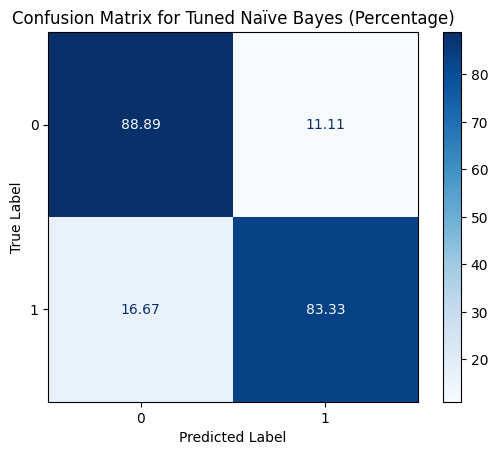

In [55]:
plot_confusion_matrix(y_test, y_test_pred_nb, "Tuned Naïve Bayes")

## Multi‐Layer Perceptron

### Intialize model

In [78]:
mlp_model = MLPClassifier()

#### Get best hyperparameters using grid search

In [79]:
# Hyperparameter grid for tuning the Decision Tree
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Different layer sizes
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimization algorithms
    'max_iter': [200, 500],  # Maximum iterations
    'learning_rate': ['constant', 'invscaling'],  # Learning rate schedules
}

In [80]:
# Set up GridSearchCV to tune hyperparameters with 5-fold cross-validation

mlp_grid_search = GridSearchCV(
    estimator=mlp_model,
    param_grid=mlp_param_grid,
    scoring='f1_weighted',  # Evaluation metric
    cv=5,  # 5-fold cross-validation
    return_train_score=True,
    n_jobs=-1  # Parallelize the process if you have multiple CPU cores
)

#### Fit model to get best hyperparameters

In [81]:
mlp_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 100)],
                         'learning_rate': ['constant', 'invscaling'],
                         'max_iter': [200, 500], 'solver': ['adam', 'sgd']},
             return_train_score=True, scoring='f1_weighted')

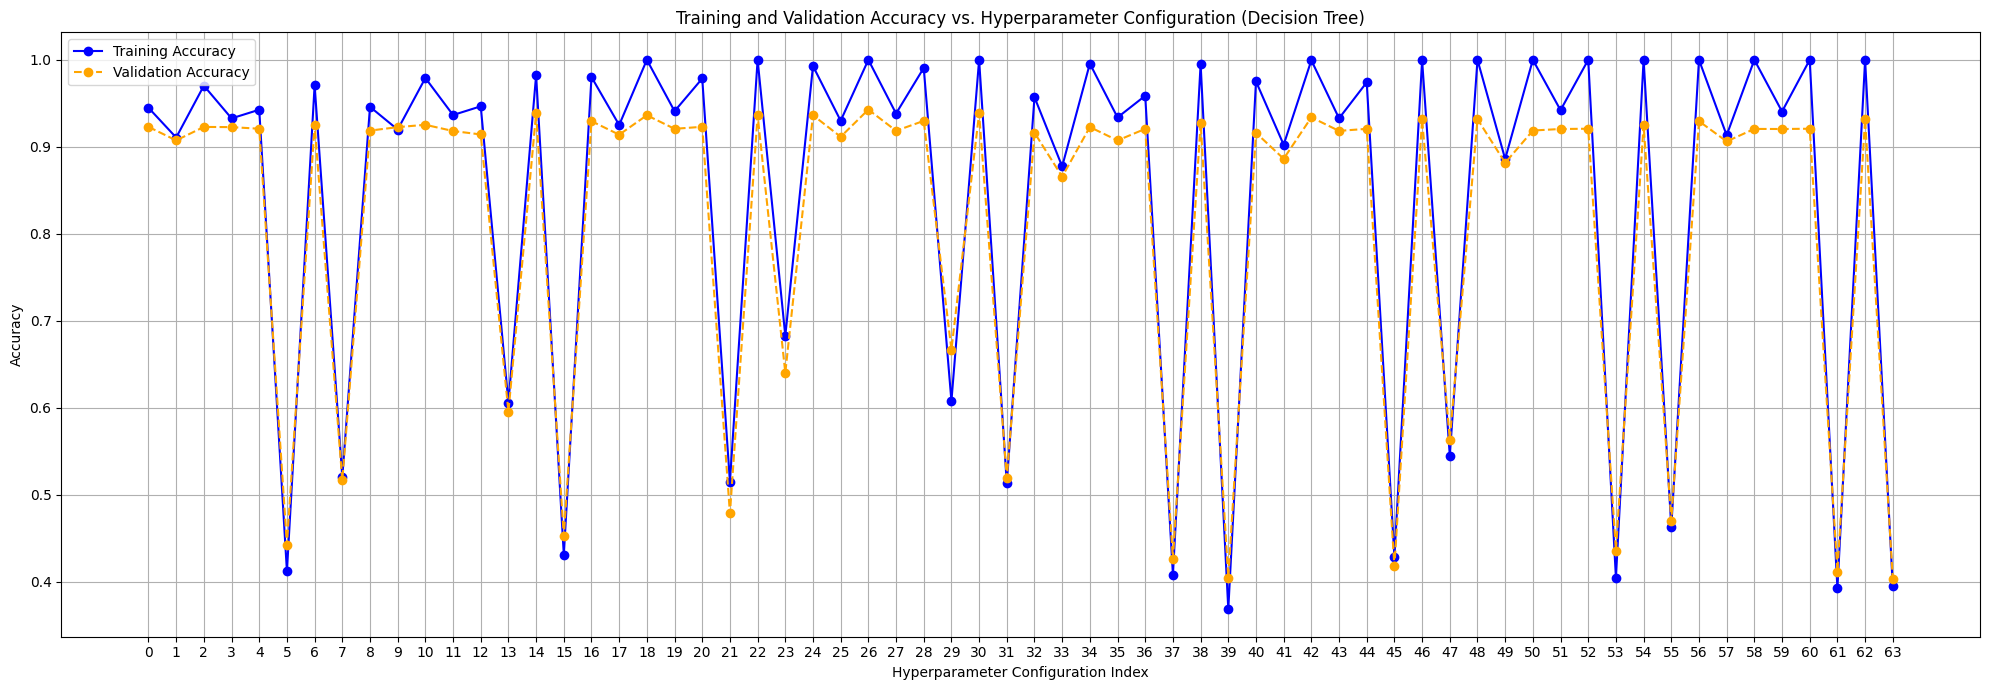


Configuration 0: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
   Training Accuracy: 0.9449 		   Validation Accuracy: 0.9229

Configuration 1: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}
   Training Accuracy: 0.9107 		   Validation Accuracy: 0.9074

Configuration 2: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
   Training Accuracy: 0.9703 		   Validation Accuracy: 0.9229

Configuration 3: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}
   Training Accuracy: 0.9327 		   Validation Accuracy: 0.9227

Configuration 4: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'adam'}
   Training Accuracy: 0.9426 		   Validation Accuracy: 0.9208

Configuration 5: {'

In [82]:
plot_hyperparameter_results(mlp_grid_search, "Decision Tree")

In [83]:
# Get the best model based on the grid search
best_mlp_model = mlp_grid_search.best_estimator_
mlp_grid_search.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'max_iter': 500,
 'solver': 'adam'}

In [84]:
mlp_grid_search.best_index_

26

### Training Evaluation

#### Grid search best model validation accuracy

In [85]:
# Get the index of the best configuration
best_config_index = mlp_grid_search.best_index_
best_val_accuracy = mlp_grid_search.cv_results_['mean_test_score'][best_config_index]

# Print the best configuration and its corresponding accuracy
print(f"Validation accuracy for best configuration: {best_val_accuracy * 100:.2f}%")

Validation accuracy for best configuration: 94.28%


#### Cross-validation accuracy after grid search

In [86]:
# Perform cross-validation
scores = cross_val_score(best_mlp_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.94505495 0.92307692 0.94505495 0.96703297 0.95604396]
Mean Accuracy: 0.9472527472527472


### Testing Evaluation

#### Classification Report

In [87]:
y_test_pred_dt = best_mlp_model.predict(X_test)
evaluate_model(y_test, y_test_pred_dt, "MLP")



MLP Performance:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193


#### Confusion Matrix

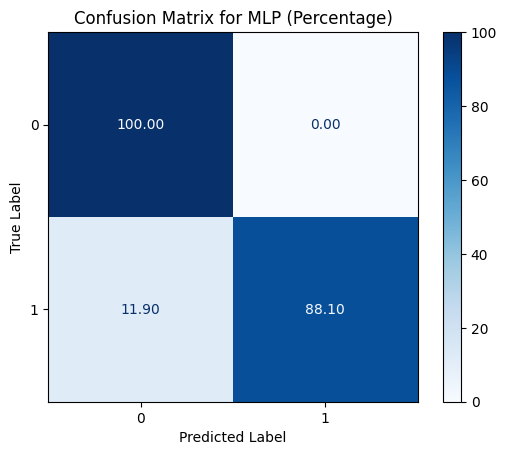

In [88]:
plot_confusion_matrix(y_test, y_test_pred_dt, "MLP")

## Models Comparisions

In [69]:
# Extract weighted average metrics
metrics = ["precision", "recall", "f1-score"]
x_labels = ["Precision", "Recall", "F1-Score"]

In [70]:
# To plot histogram
x = np.arange(len(metrics))
width = 0.15

### Validation Weighted Metrics

In [71]:
### Classification reports for validation
report_val_svm = classification_report(y_val, y_val_pred_svm, output_dict=True)
report_val_nb = classification_report(y_val, y_val_pred_nb, output_dict=True)
report_val_knn = classification_report(y_val, y_val_pred_knn, output_dict=True)
report_val_dt = classification_report(y_val, y_val_pred_dt, output_dict=True)

In [72]:
# Validation metrics
svm_val_metrics = [report_val_svm["weighted avg"][metric] for metric in metrics]
nb_val_metrics = [report_val_nb["weighted avg"][metric] for metric in metrics]
knn_val_metrics = [report_val_knn["weighted avg"][metric] for metric in metrics]
dt_val_metrics = [report_val_dt["weighted avg"][metric] for metric in metrics]

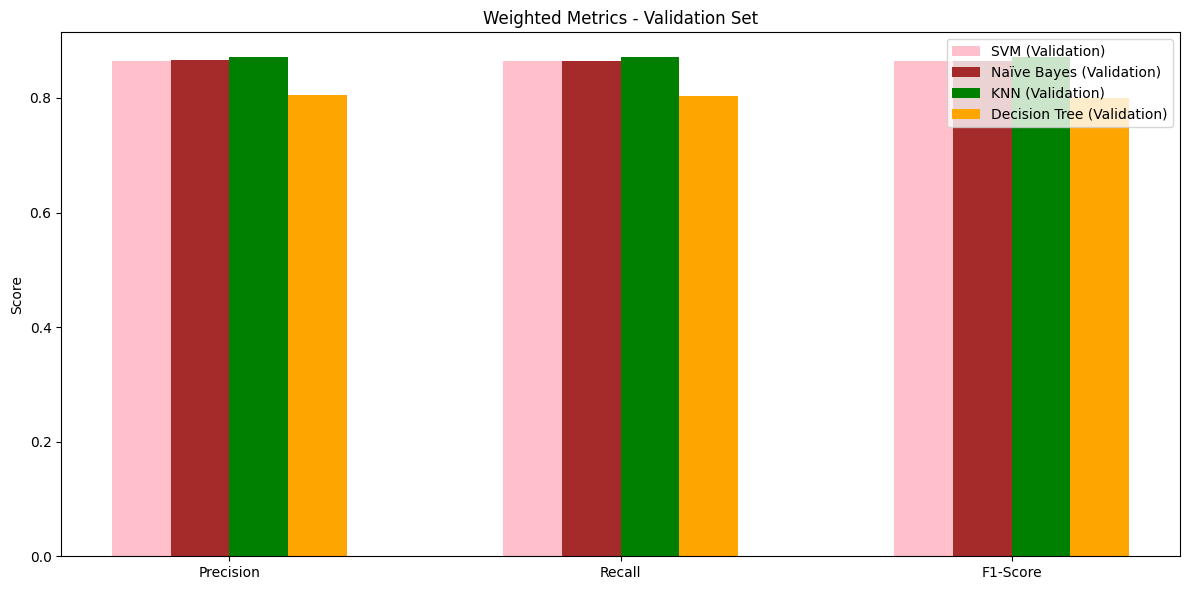

In [73]:
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * width, svm_val_metrics, width, label="SVM (Validation)", color='pink')
plt.bar(x - 0.5 * width, nb_val_metrics, width, label="Naïve Bayes (Validation)", color='brown')
plt.bar(x + 0.5 * width, knn_val_metrics, width, label="KNN (Validation)", color='green')
plt.bar(x + 1.5 * width, dt_val_metrics, width, label="Decision Tree (Validation)", color='orange')

plt.ylabel("Score")
plt.title("Weighted Metrics - Validation Set")
plt.xticks(x, x_labels)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Testing Weighted Metrics

In [74]:
# classification reports for testing
report_test_svm = classification_report(y_test, y_test_pred_svm, output_dict=True)
report_test_nb = classification_report(y_test, y_test_pred_nb, output_dict=True)
report_test_knn = classification_report(y_test, y_test_pred_knn, output_dict=True)
report_test_dt = classification_report(y_test, y_test_pred_dt, output_dict=True)

In [75]:
# Testing metrics
svm_test_metrics = [report_test_svm["weighted avg"][metric] for metric in metrics]
nb_test_metrics = [report_test_nb["weighted avg"][metric] for metric in metrics]
knn_test_metrics = [report_test_knn["weighted avg"][metric] for metric in metrics]
dt_test_metrics = [report_test_dt["weighted avg"][metric] for metric in metrics]

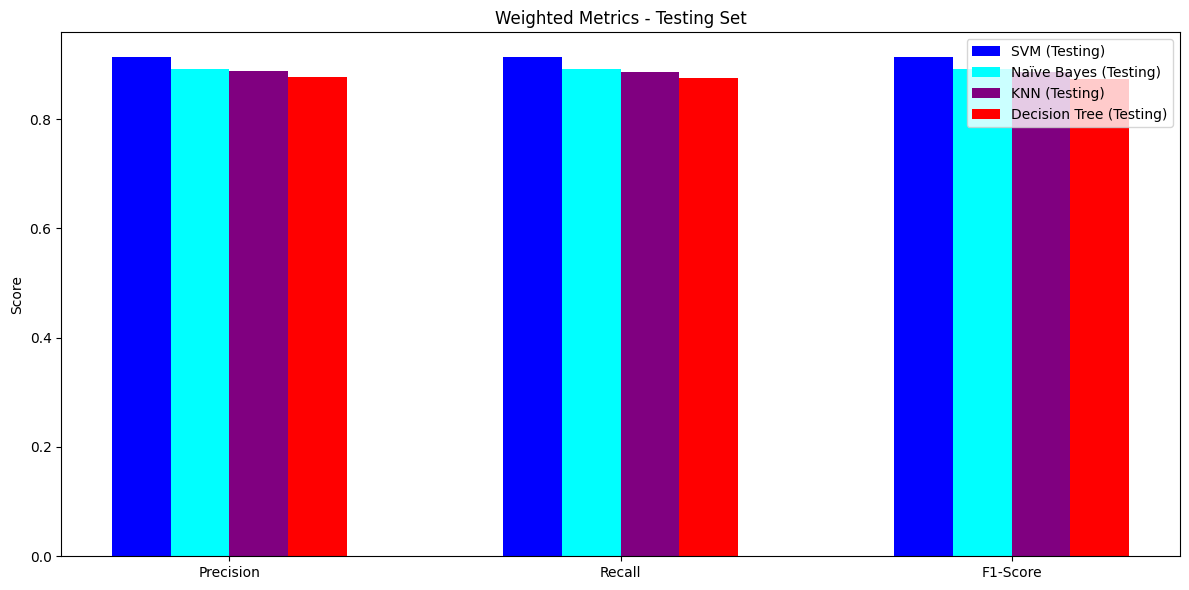

In [76]:
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * width, svm_test_metrics, width, label="SVM (Testing)", color='blue')
plt.bar(x - 0.5 * width, nb_test_metrics, width, label="Naïve Bayes (Testing)", color='cyan')
plt.bar(x + 0.5 * width, knn_test_metrics, width, label="KNN (Testing)", color='purple')
plt.bar(x + 1.5 * width, dt_test_metrics, width, label="Decision Tree (Testing)", color='red')

plt.ylabel("Score")
plt.title("Weighted Metrics - Testing Set")
plt.xticks(x, x_labels)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Dendogram

### Function to Plot Dendogram

In [77]:
def plot_dendrogram(X, method):
    # Compute the linkage matrix for hierarchical clustering
    linkage_matrix = linkage(X, method=method)

    # Plot the dendrogram
    plt.figure(figsize=(10, 6))
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Data Points or Clusters')
    plt.ylabel('Dissimilarity (Distance)')

    # Create the dendrogram plot with truncated visualization for simplicity
    dendrogram(
        linkage_matrix,
        truncate_mode='level',  # Limit the levels of hierarchy shown
        p=5,                    # Show top 5 levels
        leaf_rotation=90,       # Rotate leaf labels for better readability
        leaf_font_size=10,      # Font size for leaf labels
        show_contracted=True    # Contract large branches for readability
    )
    plt.show()
    
    return linkage_matrix

### Single linkage dendogram

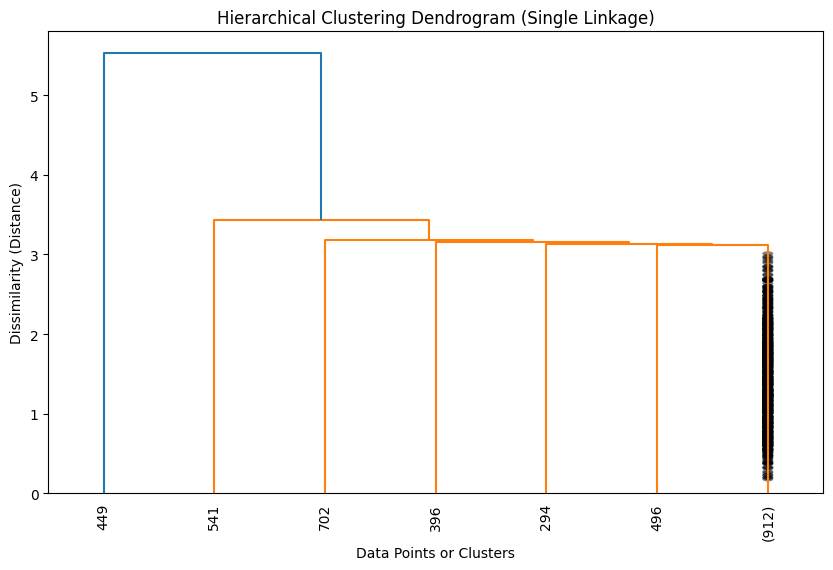

In [78]:
single_linkage = plot_dendrogram(X, 'single')

### Complete linkage dendogram

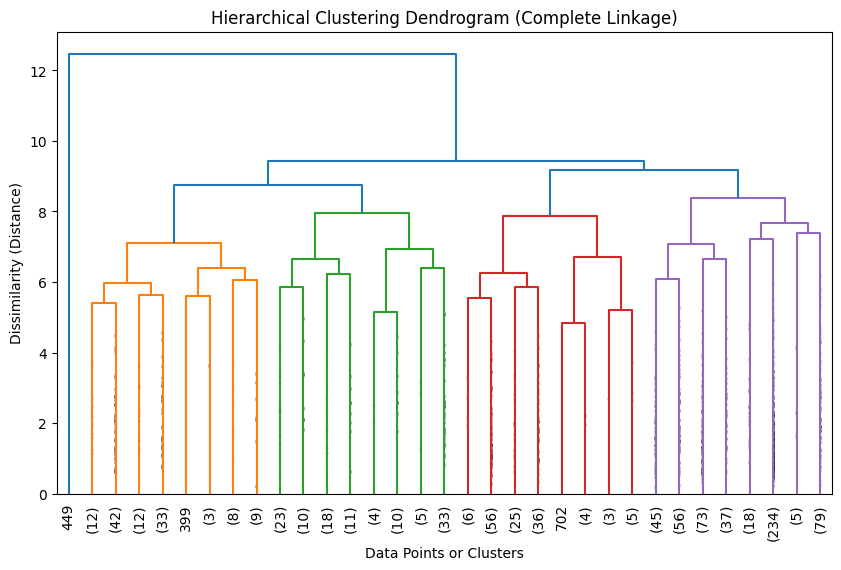

In [79]:
complete_linkage = plot_dendrogram(X, 'complete')

### Average linkage dendogram

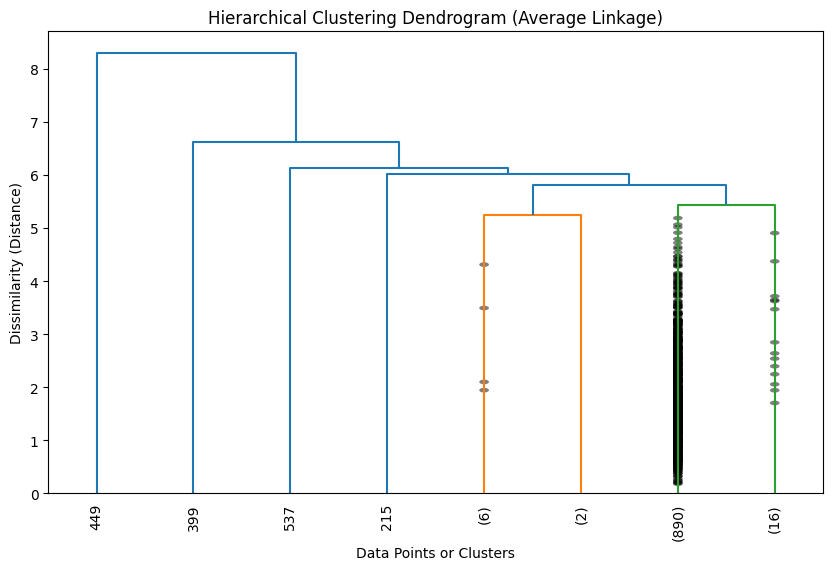

In [80]:
avg_linkage = plot_dendrogram(X, 'average')

### Centroid linkage dendogram

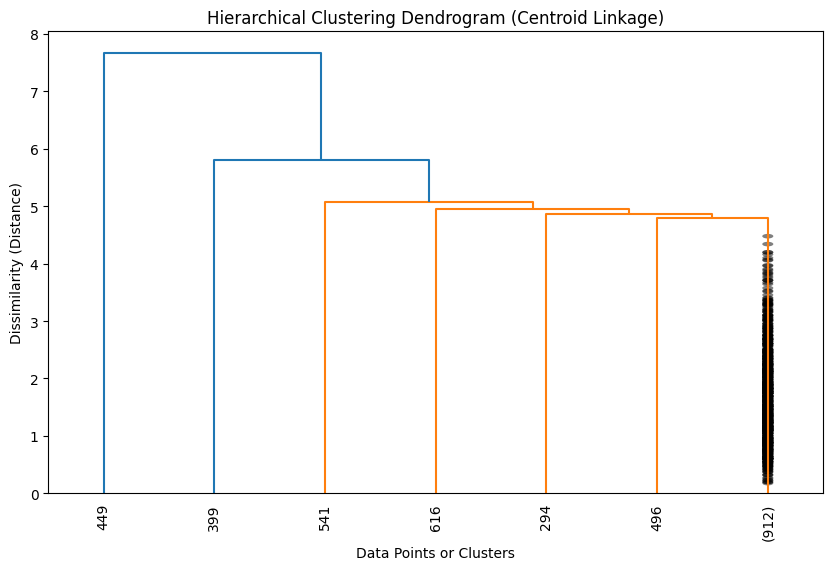

In [81]:
centroid_linkage = plot_dendrogram(X, 'centroid')

### Ward linkage dendogram

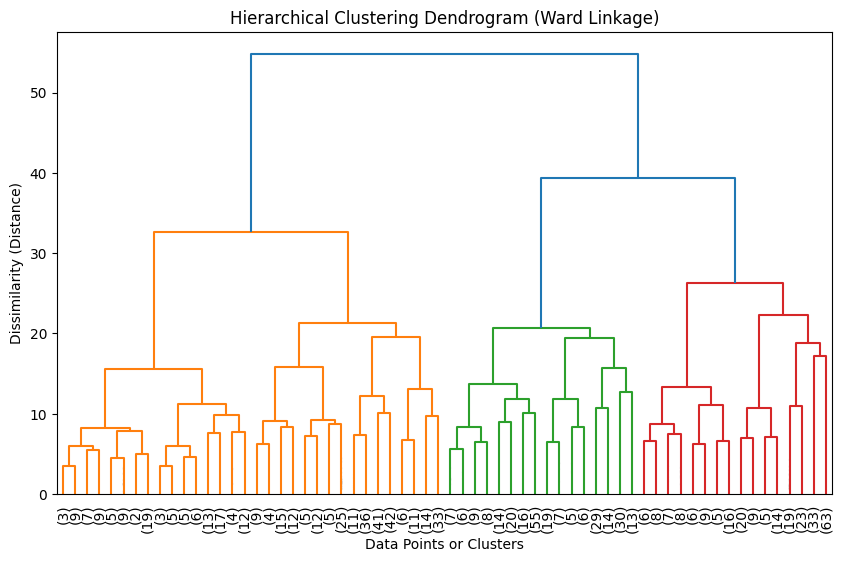

In [82]:
ward_linkage = plot_dendrogram(X, 'ward')

### Function to compare clusters with target column

In [83]:
# Add cluster labels and target labels to a DataFrame for comparison
def compare_clusters_with_target(cluster_labels):
    comparison_df = pd.DataFrame({
        'Cluster': cluster_labels,
        'Target': y
    })

    # Evaluate clustering performance
    # Count the number of data points in each cluster-target combination
    cluster_target_counts = comparison_df.groupby(['Cluster', 'Target']).size().unstack(fill_value=0)

    print("Cluster vs. Target Comparison:")
    print(cluster_target_counts)

    # Visualize the comparison
    cluster_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title('Cluster vs. Target Distribution')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title='Target')
    plt.show()

### Plot histogram to compare result clusters with target column

In [84]:
num_clusters = 2
# yes, no

#### Single Linkage

Cluster vs. Target Comparison:
Target     0    1
Cluster          
1        410  507
2          0    1


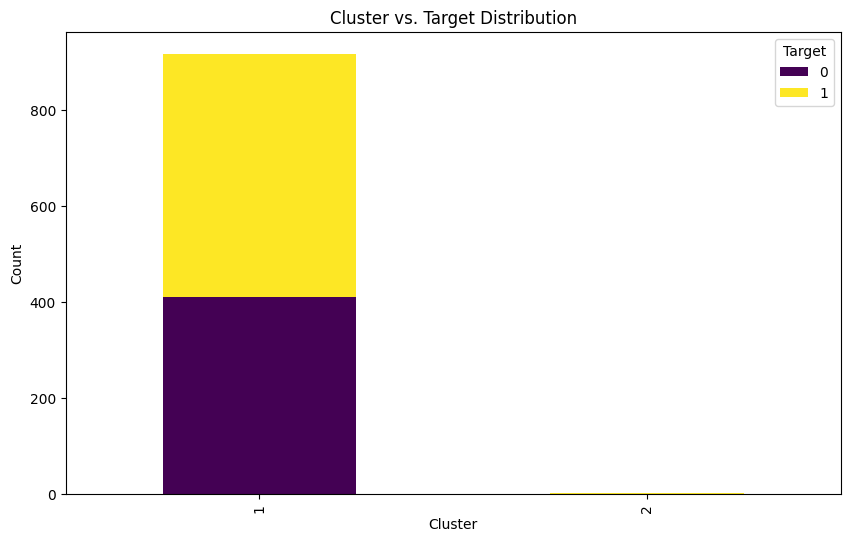

In [85]:
# Perform hierarchical clustering to get cluster labels using single linkage method
cluster_labels_Single = fcluster(single_linkage, num_clusters, criterion='maxclust')

# Compare the clusters with the actual target labels and visualize the distribution
compare_clusters_with_target(cluster_labels_Single)

#### Complete Linkage

Cluster vs. Target Comparison:
Target     0    1
Cluster          
1        410  507
2          0    1


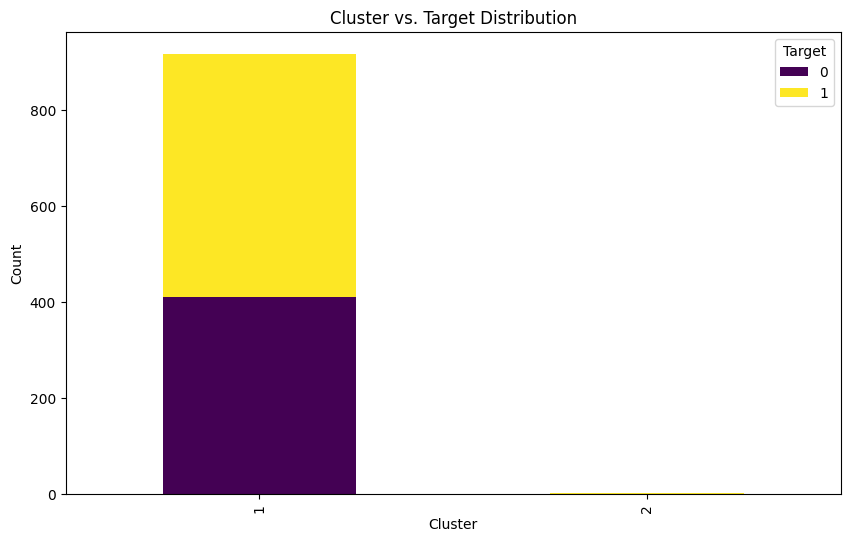

In [86]:
# Perform hierarchical clustering to get cluster labels using complete linkage method
cluster_labels_complete = fcluster(complete_linkage, num_clusters, criterion='maxclust')

# Compare the clusters with the actual target labels and visualize the distribution
compare_clusters_with_target(cluster_labels_complete)

#### Average Linkage

Cluster vs. Target Comparison:
Target     0    1
Cluster          
1        410  507
2          0    1


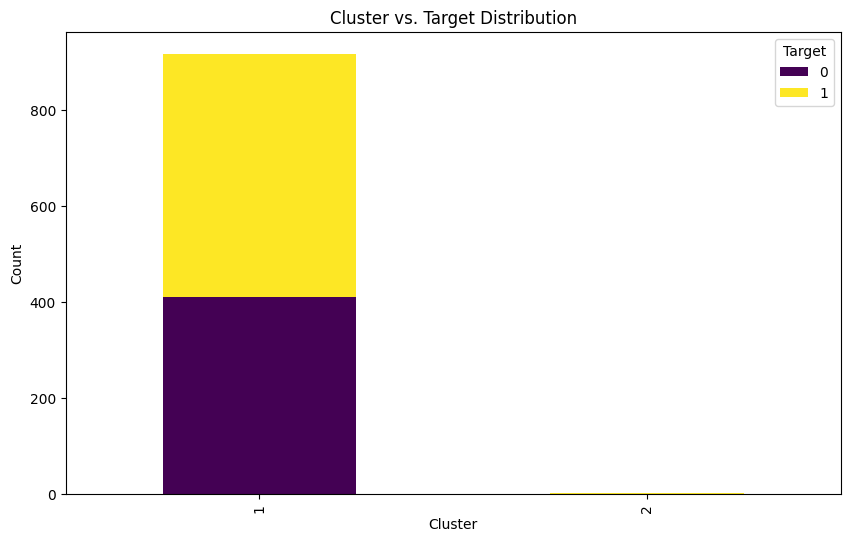

In [87]:
# Perform hierarchical clustering to get cluster labels using average linkage method
cluster_labels_average = fcluster(avg_linkage, num_clusters, criterion='maxclust')

# Compare the clusters with the actual target labels and visualize the distribution
compare_clusters_with_target(cluster_labels_average)

#### Centroid Linkage

Cluster vs. Target Comparison:
Target     0    1
Cluster          
1        410  507
2          0    1


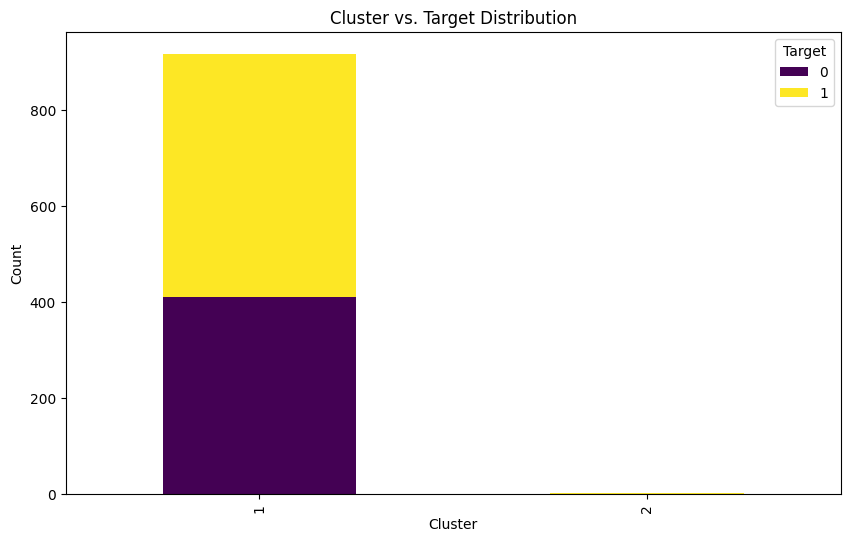

In [88]:
# Perform hierarchical clustering to get cluster labels using centroid linkage method
cluster_labels_centroid = fcluster(centroid_linkage, num_clusters, criterion='maxclust')

# Compare the clusters with the actual target labels and visualize the distribution
compare_clusters_with_target(cluster_labels_centroid)

#### Ward Linkage

Cluster vs. Target Comparison:
Target     0    1
Cluster          
1        307  102
2        103  406


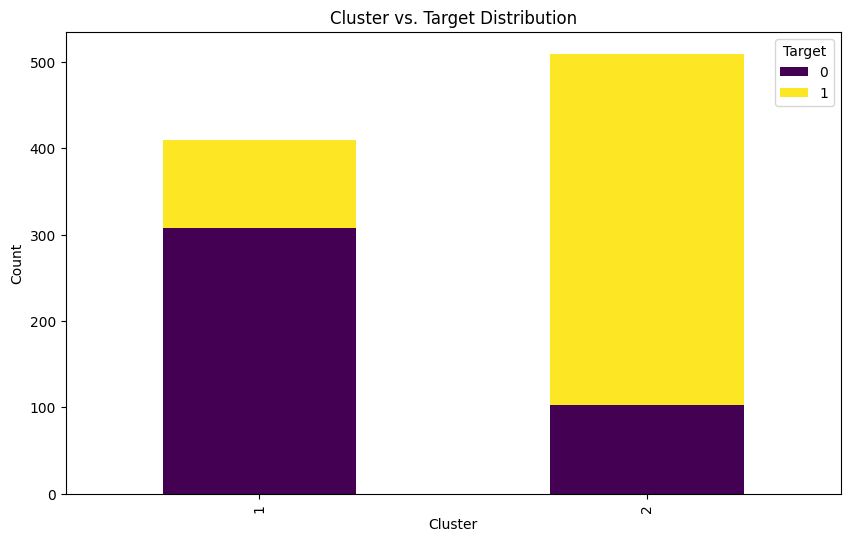

In [89]:
# Perform hierarchical clustering to get cluster labels using ward linkage method
cluster_labels_ward = fcluster(ward_linkage, num_clusters, criterion='maxclust')

# Compare the clusters with the actual target labels and visualize the distribution
compare_clusters_with_target(cluster_labels_ward)

**Looking at all linkages we found out their is an outlier index 449 that need to be removed.**